<a href="https://colab.research.google.com/github/anamarine/TFM/blob/main/Train_Test_YoloV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install and Import

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt
import torch
from yolov5 import utils
display = utils.notebook_init()  #checks


YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


# 2. Setup training things

On local - create 3 new files called all_data.yaml, tooth_data.yaml, all_but_tooth_data.yaml. Then populate it with the following:

```python
train: /content/drive/MyDrive/TFM/yoloV5_data_V2/[all OR tooth OR all_but_tooth]/images/train/ 
val:  /content/drive/MyDrive/TFM/yoloV5_data_V2/[all OR tooth OR all_but_tooth]/images/val/
test: /content/drive/MyDrive/TFM/yoloV5_data_V2/[all OR tooth OR all_but_tooth]/images/test/

# number of classes
nc: 13

# class names
names: ["Tooth", "Metal (Implant)", "Metal", "Maxilla", "Mandible", "Inferior Alveolar Nerve", "Maxillary Sinus", "Plastic Restoration", "Endodontic Treatment", "Crown/Pontic", "Metallic Restoration", "Screw", "Supernumerary"]
```

  
Place it in the yolov5/data folder -> Copy yaml with instructions into yolo folder (cd route_to_yaml; shutil.copy...;)

In [2]:
cd

/root


In [3]:
cd /content/drive/MyDrive/TFM/yaml/

/content/drive/MyDrive/TFM/yaml


In [4]:
shutil.copy('all_data.yaml', '/content/yolov5/data/')

'/content/yolov5/data/all_data.yaml'

In [5]:
shutil.copy('tooth_data.yaml', '/content/yolov5/data/')

'/content/yolov5/data/tooth_data.yaml'

In [6]:
shutil.copy('all_but_tooth_data.yaml', '/content/yolov5/data/')

'/content/yolov5/data/all_but_tooth_data.yaml'

In [7]:
cd /content/drive/MyDrive/TFM/weights/

/content/drive/MyDrive/TFM/weights


In [8]:
shutil.copy('all_2405_weights.pt', '/content/yolov5/')

'/content/yolov5/all_2405_weights.pt'

In [9]:
shutil.copy('tooth_2405_weights.pt', '/content/yolov5/')

'/content/yolov5/tooth_2405_weights.pt'

In [10]:
shutil.copy('all_but_tooth_2405_weights.pt', '/content/yolov5/')

'/content/yolov5/all_but_tooth_2405_weights.pt'

In [11]:
cd

/root


In [12]:
cd /content/drive/MyDrive/TFM/

/content/drive/MyDrive/TFM


In [13]:
#shutil.copytree('yoloV5_data', '/content/data/')

# IMPORTANT: rename "annotations" folders to "labels"



At this point we should select the Training Options (https://blog.paperspace.com/train-yolov5-custom-data/) We use various flags to set options regarding training. -> set up these when giving the command

**Hyperparameter Config File:**   The hyperparameter config file helps us define the hyperparameters for our neural network. We are going to use the default one, ```data/hyp.scratch.yaml```. This is what it looks like.

**Custom Network Architecture:** YOLO v5 also allows you to define your own custom architecture and anchors if one of the pre-defined networks doesn't fit the bill for you. For this you will have to define a custom weights config file. For this example, we use the the ```yolov5s.yaml```. This is what it looks like.


# 3. Evolve and train

In [14]:
cd

/root


In [15]:
cd /content/yolov5

/content/yolov5


In [16]:
ls

all_2405_weights.pt            export.py   requirements.txt*      utils/
all_but_tooth_2405_weights.pt  hubconf.py  setup.cfg              val.py
CONTRIBUTING.md                LICENSE     tooth_2405_weights.pt
data/                          models/     train.py
detect.py                      README.md   tutorial.ipynb


Train command:

```!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch.yaml --batch 32 --epochs 100 --data xray_data.yaml --weights yolov5s.pt --workers 24 --name yolo_teeth_det```

* ```img``` -> image size
* ```cfg``` -> config
* ```hyp``` -> mallest of pretrained models yolo5s
* ```batch``` -> batch size
* ```epochs``` -> numb. epochs
* ```data``` -> data yaml (the one created and copied
* ```weights``` -> 
* ```workers``` -> 
* ```name``` -> name for our training


If you have issues fitting the model into the memory:
* Use a smaller batch size
* Use a smaller network
* Use a smaller image size

### Evolve hyperparameters



In [17]:
!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-low.yaml --batch 32 --epochs 10 --data all_data.yaml --workers 10 --evolve 10 --name yolo_all_evolve
#!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-low.yaml --batch 32 --epochs 10 --data all_but_tooth_data.yaml --workers 10 --evolve --name yolo_all_but_tooth_evolve
#!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-low.yaml --batch 32 --epochs 10 --data tooth_data.yaml --workers 10 --evolve --name yolo_tooth_evolve

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=all_data.yaml, hyp=hyp.scratch-low.yaml, epochs=10, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=10, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=10, project=runs/train, name=yolo_all_evolve, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_

In [18]:
cd


/root


In [19]:
cd /content/yolov5/runs/evolve/yolo_all_evolve

/content/yolov5/runs/evolve/yolo_all_evolve


In [20]:
os.rename('hyp_evolve.yaml', 'hyp_evolve_all.yaml')
shutil.copy('hyp_evolve_all.yaml', '/content/yolov5/data/hyps')

'/content/yolov5/data/hyps/hyp_evolve_all.yaml'

In [21]:
cd /content/yolov5/

/content/yolov5


In [22]:
!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp_evolve_all.yaml --batch 32 --epochs 30 --data all_data.yaml --weights all_2405_weights.pt --workers 10 --name yolo_all_train

train: weights=all_2405_weights.pt, cfg=yolov5s.yaml, data=all_data.yaml, hyp=hyp_evolve_all.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=10, project=runs/train, name=yolo_all_train, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=

# 4. Test and check

In [34]:
!python detect.py --source /content/drive/MyDrive/TFM/yoloV5_data/all/images/det --weights runs/train/yolo_all_train/weights/best.pt --conf 0.2 --augment --agnostic --visualize --name yolo_all_det

detect: weights=['runs/train/yolo_all_train/weights/best.pt'], source=/content/drive/MyDrive/TFM/yoloV5_data/all/images/det, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=True, visualize=True, update=False, project=runs/detect, name=yolo_all_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/35 /content/drive/MyDrive/TFM/yoloV5_data/all/images/det/69_copia.jpg: 384x640 36 Tooths, 1 Maxilla, 1 Mandible, 1 Inferior Alveolar Nerve, 1 Maxillary Sinus, 4 Plastic Restorations, Done. (0.051s)
image 2/35 /content/drive/MyDrive/TFM/yoloV5_data/all/images/det/6_copia.jpg: 320x640 35 Tooths, 1 Max

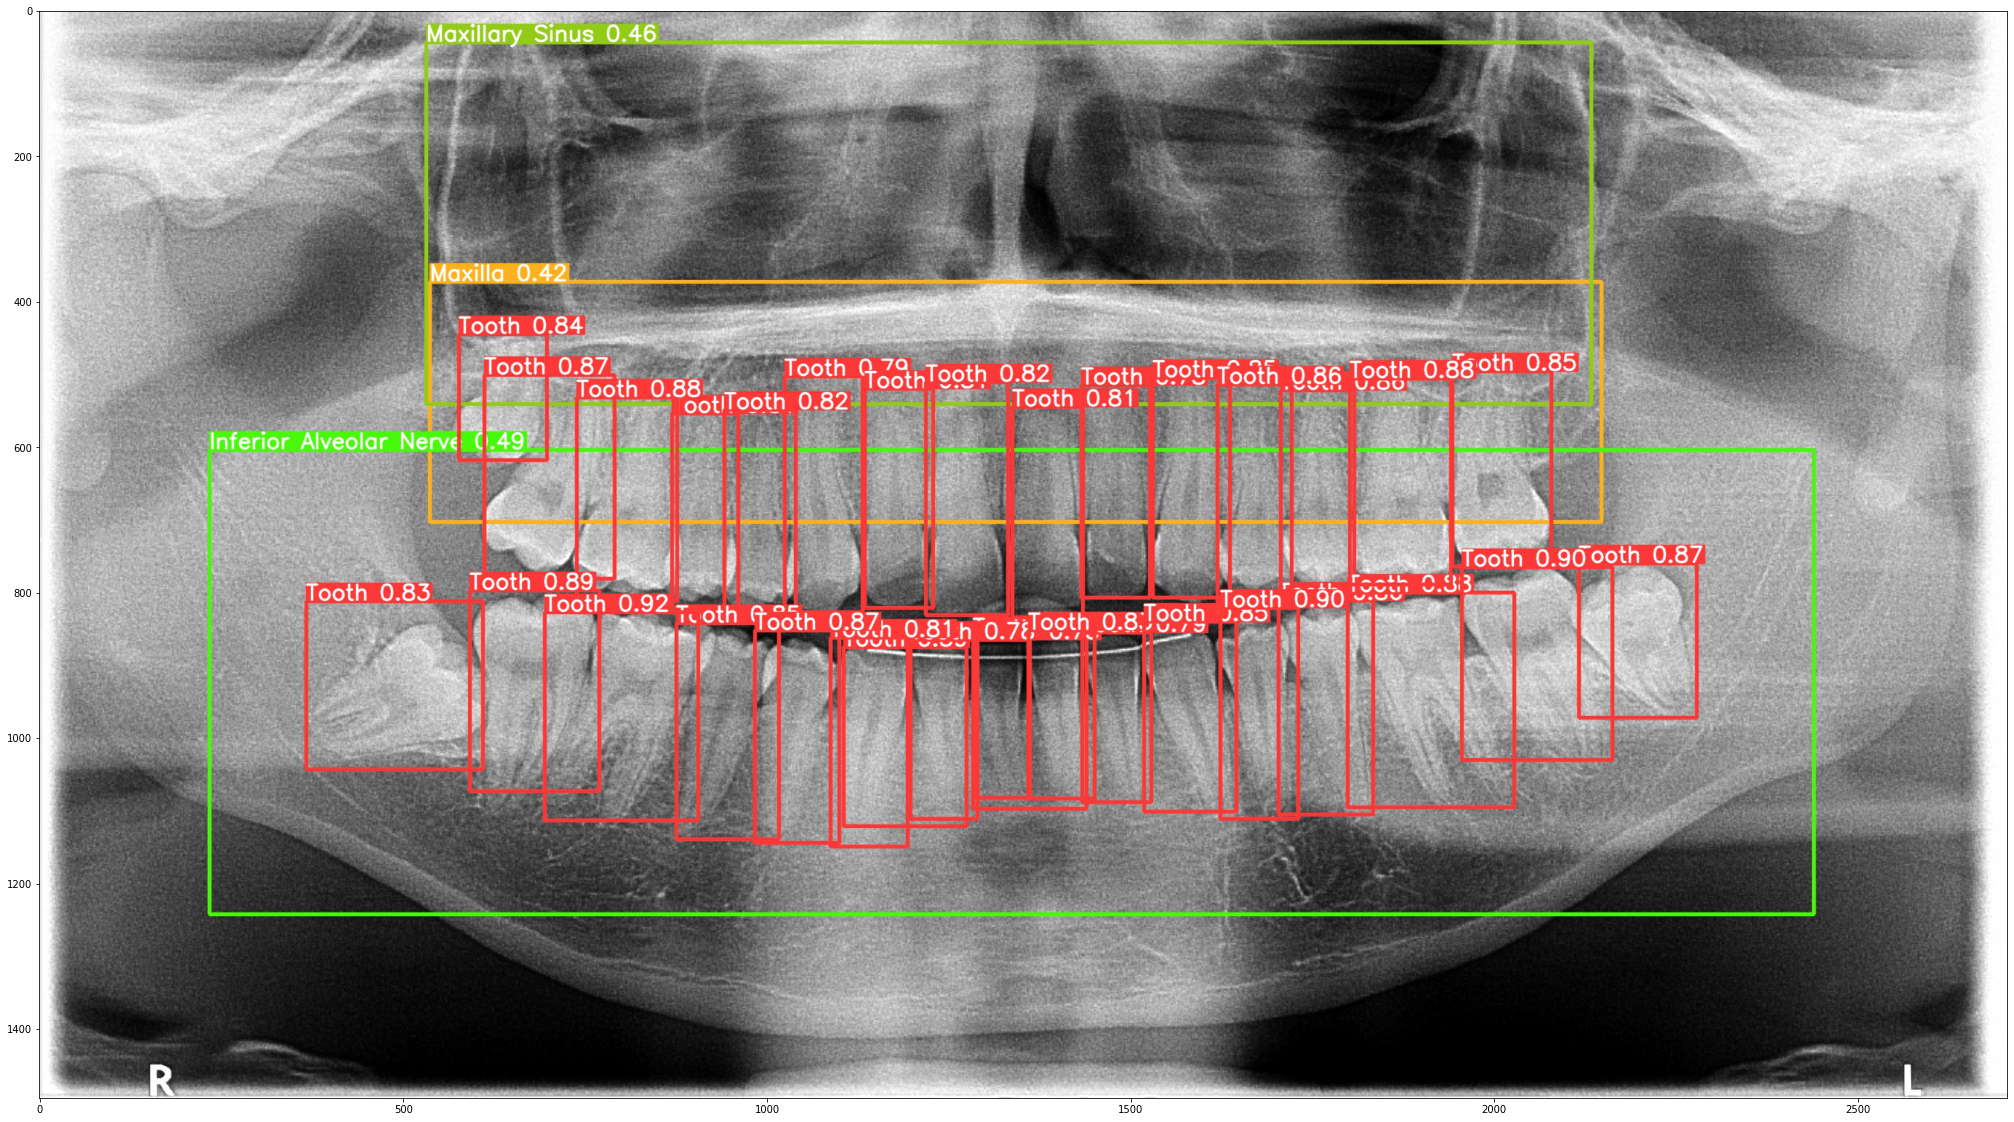

In [36]:
detections_dir = "/content/yolov5/runs/detect/yolo_all_det3"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(detection_images[40])
plt.figure(figsize = (60, 20))
plt.imshow(np.array(random_detection_image))

In [40]:
!python val.py --weights runs/train/yolo_all_train/weights/best.pt --data all_data.yaml --task test --save-hybrid --name yolo_all_val


val: data=/content/yolov5/data/all_data.yaml, weights=['runs/train/yolo_all_train/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=True, save_conf=False, save_json=False, project=runs/val, name=yolo_all_val, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
test: Scanning '/content/drive/MyDrive/TFM/yoloV5_data/all/labels/val.cache' images and labels... 27 found, 0 missing, 0 empty, 0 corrupt: 100% 27/27 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 1/1 [00:07<00:00,  7.18s/it]
                 all         27        974          1          1      0.995      0.995
               Tooth         27        722          1         

In [38]:
!zip -r /content/yolov5.zip /content/yolov5

updating: content/yolov5/ (stored 0%)
updating: content/yolov5/all_2405_weights.pt (deflated 9%)
updating: content/yolov5/.gitignore (deflated 55%)
updating: content/yolov5/requirements.txt (deflated 49%)
updating: content/yolov5/.gitattributes (deflated 4%)
updating: content/yolov5/hubconf.py (deflated 73%)
updating: content/yolov5/val.py (deflated 67%)
updating: content/yolov5/README.md (deflated 72%)
updating: content/yolov5/tutorial.ipynb (deflated 78%)
updating: content/yolov5/__pycache__/ (stored 0%)
updating: content/yolov5/__pycache__/export.cpython-37.pyc (deflated 52%)
updating: content/yolov5/__pycache__/val.cpython-37.pyc (deflated 43%)
updating: content/yolov5/yolov5n.pt (deflated 12%)
updating: content/yolov5/yolov5s.pt (deflated 9%)
updating: content/yolov5/data/ (stored 0%)
updating: content/yolov5/data/VOC.yaml (deflated 56%)
updating: content/yolov5/data/Argoverse.yaml (deflated 56%)
updating: content/yolov5/data/Objects365.yaml (deflated 57%)
updating: content/yolov5

In [39]:
from google.colab import files
files.download("/content/yolov5.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>